# Data Science Salaries 2024
___Tendências salariais na área de ciência de dados (2020-2024)___

> Referência - https://www.kaggle.com/datasets/sazidthe1/data-science-salaries

## Sobre o conjunto de dados
**Contexto** <br><br>
_No campo em rápida evolução da ciência de dados, compreender as tendências e padrões salariais é crucial tanto para profissionais como para organizações. Este conjunto de dados tem como objetivo lançar luz sobre o cenário dos salários da ciência de dados de 2020 a 2024. Ao analisar os dados salariais durante esse período, entusiastas de dados, pesquisadores e profissionais do setor podem obter informações valiosas sobre tendências salariais, variações regionais e fatores potenciais que influenciam a remuneração. dentro da comunidade de ciência de dados._

_O conjunto de dados abrange uma coleção abrangente de informações salariais de ciência de dados, cobrindo um período de cinco anos, de 2020 a 2024. Os dados incluem vários aspectos relacionados aos salários, proporcionando uma visão multifacetada da remuneração na área._

## Estrutura do Dataset

- job_title: O cargo ou função associada ao salário informado.

- experience_level: O nível de experiência do indivíduo.

- employment_type: Indica se o emprego é por tempo integral, ou tempo parcial, etc.

- work_models: Descreve diferentes modelos de trabalho (remoto, presencial, híbrido).

- work_year: O ano específico em que as informações salariais foram registradas.

- employee_residence: O local de residência do funcionário.

- salary: Valor total do salário bruto pago.

- salary_currency: A moeda em que o salário é denominado.

- salary_in_usd: O salário convertido em dólares americanos.

- company_location: A localização geográfica da organização empregadora.

- company_size: O tamanho da empresa, categorizado pelo número de funcionários.


## 1. Importação das Bibliotecas

In [1]:
import os 

# Bibliotecas de Manipulação, Cálculos Matemáticos e Estatísticos
import pandas as pd
import numpy as np
import scipy.stats as stats

# Bibliotecas de Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import datetime

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# plt.rcParams['figure.figsize'] = (20,10)
# plt.rcParams["figure.autolayout"] = True

# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.0f}'.format

## 2. Funções

In [2]:
# Função para mostrar os tipos de dados e as métricas do(s) dataset(s).

def infos_dataset(dataset, feature):
    type = dataset.dtypes
    count = dataset.count()
    missing = dataset.isnull().sum() / len(dataset) * 100
    nunique = dataset.nunique()
    duplicated = dataset[dataset.duplicated(keep = False, subset = [feature])].sort_values(by = feature).count()

    tabel = pd.concat([type, count, missing, nunique, duplicated], axis = 1, 
                       keys = ['type', 'count', 'missing', 'nunique', 'duplicated'])
    return tabel

# Função pra gerar o coeficiente de variação
def coef_variacao(data, column):
    cv = (data[column].std() / data[column].mean()) * 100
    if cv > 30:
        print('Porcentagem: {}, A média do conjunto de dados não é uma boa medida para representação dos dados.'.format(cv))
    else:
         print('Porcentagem: {}, A média do conjunto de dados é uma boa medida para representação dos dados.'.format(cv))

# Função para gerar medidas de associação entre variáveis qualitativas ordinais
def coef_spearman(x,y):
    rho, p_value = stats.spearmanr(x, y)
    return rho

# Função para gerar medidas de associação entre variáveis qualitativas nominais
def cramer_v(x,y):
    cm = pd.crosstab(x,y).values
    n = cm.sum()
    r, k = cm.shape
    chi2 = stats.chi2_contingency(cm, correction=False)[0]
    result = np.sqrt((chi2/n) / (min(k-1, r-1)))
    return result

## 3. Carregar o Dataset

In [3]:
df = pd.read_csv('dataset/data_science_salaries.csv')

## 4. Visualizar o Dataset

In [4]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


## 5. Tipos e Métricas do Dataset

In [5]:
infos_dataset(df, 'job_title')

,type,count,missing,nunique,duplicated
job_title,object,6599,0,132,6583
experience_level,object,6599,0,4,6583
employment_type,object,6599,0,4,6583
work_models,object,6599,0,3,6583
work_year,int64,6599,0,5,6583
employee_residence,object,6599,0,87,6583
salary,int64,6599,0,1833,6583
salary_currency,object,6599,0,22,6583
salary_in_usd,int64,6599,0,2147,6583
company_location,object,6599,0,75,6583


## 6. Relatório Inicial

- Até o momento podemos identificar um dataset bem limpo, onde não possui valores missing.
- As features estão bem estruturadas, possuem valores duplicados, mas são valores repetidos que identificam características das features, e não valores duplicados que possam atrapalhar o entendimento do EDA.

- O dataset possui 6599 linhas e 11 colunas.
- Os tipos dos dados das features estão distribuídas mais como categóricas do que numéricas.


## 7. Transformação no Dataset

In [6]:
df_ds_salaries = df.copy()

In [7]:
lst_columns = { 'job_title':'cargo', 'experience_level':'nivel_de_experiencia', 'employment_type':'tipo_de_emprego', 
                'work_models':'modelos_de_trabalho', 'work_year':'ano_trabalho', 'employee_residence':'residencia_funcionario', 
                'salary':'salario', 'salary_currency':'salario_moeda', 'salary_in_usd':'salario_em_dolar', 
                'company_location':'local_da_empresa', 'company_size':'tamanho_da_empresa' }

##### Renomear as colunas para melhor visualização

In [8]:
df_ds_salaries.rename(columns=lst_columns, inplace = True)

##### Transformação na feature Cargo

- Há uma lista relativamente grande com relação a distribuição de cargos no dataset, há muitos cargos com nomes distintos, mas com skills semelhantes, seria interessante fazer uma transformação antes da análise, pois assim ficará mais simples distinguir os cargos.

In [9]:
df_ds_salaries['cargo'].replace({
                        'Data Science':'Data Scientist',
                        'BI Developer':'BI Analyst',
                        'Research Analyst':'Data Analyst',
                        'Business Intelligence Developer':'BI Analyst',
                        'Director of Data Science':'Data Science Director',
                        'Machine Learning Scientist':'Data Scientist',
                        'Applied Scientist':'Data Scientist',
                        'Business Intelligence Analyst':'BI Analyst',
                        'Business Intelligence Engineer':'Analytics Engineer',
                        'Research Scientist':'Data Scientist',
                        'Research Engineer':'Data Engineer',
                        'Managing Director Data Science':'Data Science Director',
                        'Data Specialist':'Data Scientist',
                        'Data Architect':'Data Engineer',
                        'Data Visualization Specialist':'Data Analyst',
                        'ETL Developer':'Data Engineer',
                        'Data Science Practitioner':'Data Scientist',
                        'ML Engineer':'Machine Learning Engineer',
                        'Data Developer':'Data Engineer',
                        'Data Modeler':'Data Engineer',
                        'Data Science Consultant':'Data Scientist',
                        'Data Science Engineer':'Machine Learning Engineer',
                        'Data Quality Analyst':'Data Analyst',
                        'Data Strategist':'Data Analyst',
                        'Data Quality Analyst':'Data Analyst',
                        'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                        'Data Integration Engineer':'Data Engineer',
                        'Data Management Analyst':'Data Analyst',
                        'Business Data Analyst':'Data Analyst',
                        'Machine Learning Operations Engineer':'Machine Learning Engineer',
                        'Marketing Data Scientist':'Data Scientist',
                        'Machine Learning Researcher':'Data Scientist',
                        'Machine Learning Modeler':'Data Scientist',
                        'Data Integration Specialist':'Data Engineer',
                        'Data Management Specialist':'Data Engineer',
                        'Business Intelligence Specialist':'BI Analyst',
                        'Data Quality Engineer':'Data Engineer',
                        'Decision Scientist':'Data Scientist',
                        'Financial Data Analyst':'Data Analyst',
                        'Data Strategy Manager':'Data Analyst',
                        'Data Visualization Engineer':'Data Analyst',
                        'Principal Data Scientist':'Data Scientist',
                        'Data Infrastructure Engineer':'Data Engineer',
                        'Machine Learning Software Engineer':'Machine Learning Engineer',
                        'Head of Machine Learning':'Data Science Head',
                        'Data Operations Analyst':'Data Analyst',
                        'Data Operations Engineer':'Data Engineer',
                        'BI Data Analyst':'BI Analyst',
                        'Deep Learning Engineer':'Data Scientist',
                        'Data Operations Manager':'Data Engineer',
                        'Head of Data Science':'Data Science Head',
                        'Software Data Engineer':'Data Engineer',
                        'Compliance Data Analyst':'Data Analyst',
                        'Data Operations Specialist':'Data Engineer',
                        'Business Intelligence Data Analyst':'BI Analyst',
                        'Product Data Analyst':'Data Analyst',
                        'Data Visualization Analyst':'Data Analyst',
                        'Cloud Data Engineer':'Data Engineer',
                        'Finance Data Analyst':'Data Analyst',
                        'Applied Machine Learning Engineer':'Machine Learning Engineer',
                        'BI Data Engineer':'Data Engineer',
                        'Cloud Database Engineer':'Data Engineer',
                        'Applied Machine Learning Scientist':'Data Scientist',
                        'Data Analytics Specialist':'Data Analyst',
                        'Big Data Engineer':'Data Engineer',
                        'Machine Learning Research Engineer':'Machine Learning Engineer',
                        'Staff Data Analyst':'Data Analyst', 
                        'Insight Analyst':'Data Analyst',
                        'Azure Data Engineer':'Data Engineer',
                        'Applied Data Scientist':'Data Scientist',
                        'Principal Machine Learning Engineer':'Machine Learning Engineer',
                        'Data Modeller':'Data Engineer',
                        'ETL Engineer':'Data Engineer',
                        'Big Data Architect':'Data Engineer',
                        'Machine Learning Specialist':'Data Scientist',
                        'Data DevOps Engineer':'Data Engineer',
                        'Principal Data Engineer':'Data Engineer',
                        'Power BI Developer':'BI Analyst',
                        'Deep Learning Researcher':'Data Scientist',
                        'Consultant Data Engineer':'Data Engineer',
                        'Data Analytics Consultant':'Data Analyst',
                        'Data Analytics Engineer':'Analytics Engineer',
                        'Machine Learning Developer':'Data Scientist',
                        'Principal Data Architect':'Data Engineer',
                        'Marketing Data Analyst':'Data Analyst',
                        'Principal Data Analyst':'Data Analyst',
                        'Staff Machine Learning Engineer':'Machine Learning Engineer',
                        'Staff Data Scientist':'Data Scientist',
                        'Marketing Data Engineer':'Data Engineer',
                        'Sales Data Analyst':'Data Analyst'}, inplace=True)

In [10]:
df_ds_salaries.to_csv('dataset/data_science_salaries_renamed.csv')

## 8. Tipos de Dados

### Classificação de uma variável
<img src='https://img.freepik.com/premium-vector/4-types-data-with-nominal-ordinal-discrete-continuous-data_518018-2059.jpg?w=900' width='50%'>

### 8.1 Variáveis Qualitativas Ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [11]:
variaveis_qualitativas_ordinais = ['nivel_de_experiencia', 'tamanho_da_empresa']

► Describe

In [12]:
df_ds_salaries[variaveis_qualitativas_ordinais].describe()

,nivel_de_experiencia,tamanho_da_empresa
count,6599,6599
unique,4,3
top,Senior-level,Medium
freq,4105,5860


- Nível Sênior é o nível mais frequente.
- Tamanho Médio é o tamanho da empresa mais frequente.

### 8.2 Variáveis Qualitativas Nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [13]:
variaveis_qualitativas_nominais = ['cargo', 'tipo_de_emprego', 'modelos_de_trabalho',
                                   'residencia_funcionario', 'salario_moeda', 'local_da_empresa']

► Describe

In [14]:
df_ds_salaries[variaveis_qualitativas_nominais].describe()

,cargo,tipo_de_emprego,modelos_de_trabalho,residencia_funcionario,salario_moeda,local_da_empresa
count,6599,6599,6599,6599,6599,6599
unique,44,4,3,87,22,75
top,Data Scientist,Full-time,On-site,United States,USD,United States
freq,1863,6552,3813,5305,5827,5354


- Data Engineer é o cargo mais frequente.
- Full-time (Período Integral) é o tipo de emprego mais frequente.
- On-site (Presencial) é o modelo de trabalho mais frequente.
- Estados Unidos é a residência do funcionário mais frequente.
- Dólar é o salário moeda mais frequente.
- Estados Unidos ó local da empresa mais frequente.

### 8.3 Variáveis Quantitativas Discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [15]:
variaveis_quantitativas_discretas = ['ano_trabalho']

► Describe

In [16]:
df_ds_salaries[variaveis_quantitativas_discretas].describe().round(2).style.format(precision=2).background_gradient(cmap='YlOrRd')

,ano_trabalho
count,6599.00
mean,2022.82
std,0.67
min,2020.00
25%,2023.00
50%,2023.00
75%,2023.00
max,2024.00


- Em ano trabalho a média é o ano de 2022, o mínimo ó ano de 2020, a mediana é 2023, o máximo é o ano de 2024.

### 8.4 Variáveis Quantitativas Contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [17]:
variaveis_quantitativas_continuas = ['salario', 'salario_em_dolar']

► Describe

In [18]:
df_ds_salaries[variaveis_quantitativas_continuas].describe().round(2).style.format(precision=2).background_gradient(cmap='YlOrRd')

,salario,salario_em_dolar
count,6599.00,6599.00
mean,179283.26,145560.56
std,526372.24,70946.84
min,14000.00,15000.00
25%,96000.00,95000.00
50%,140000.00,138666.00
75%,187500.00,185000.00
max,30400000.00,750000.00


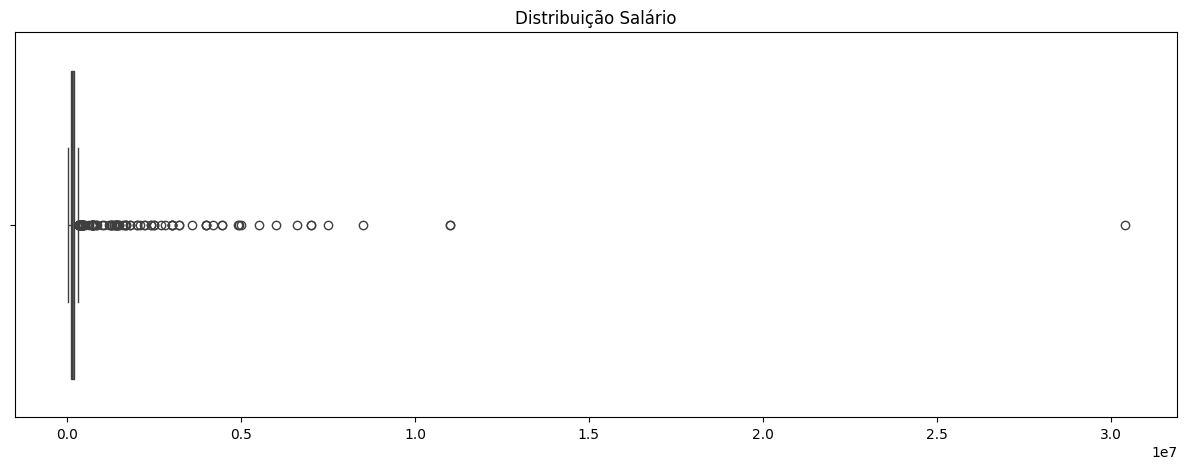

In [19]:
# DISTRIBUIÇÃO SALÁRIO

plt.figure(figsize=(15,5))
plt.title('Distribuição Salário')
ax = sns.boxplot(x = df_ds_salaries['salario'])
ax.set(xlabel=None, ylabel=None)
plt.show()

► TESTE DE COEFICIENTE DE VARIAÇÃO

O coeficiente de variação (CV) é uma medida de dispersão relativa que fornece a variação dos dados em relação
à média. Quanto menor for o seu valor, mais homogêneos serão os dados, ou seja, menor será a dispersão
em torno da média.

Um CV pode ser considerado baixo, indicando um conjunto de dados razoavelmente homogêneo, quando
for menor do que 30%. Se esse valor for acima de 30%, o conjunto de dados pode ser considerado heterogêneo.
Entretanto, esse padrão varia de acordo com a aplicação.

In [20]:
# COEFICIENTE DE VARIAÇÃO PARA VERIFICAR SE A MÉDIA É UMA BOA MEDIDA PARA REPRESENTAÇÃO DOS DADOS.
coef_variacao(df_ds_salaries, 'salario')

Porcentagem: 293.5981059005148, A média do conjunto de dados não é uma boa medida para representação dos dados.


- Resultado Negativo, realmente a média não é uma boa medida para representação dos dados.

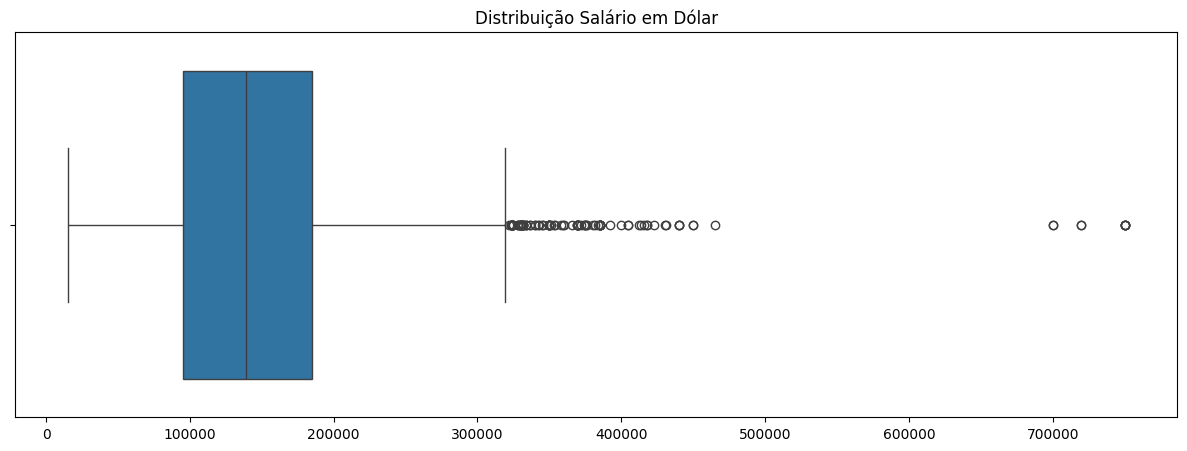

In [21]:
# DISTRIBUIÇÃO SALÁRIO EM DÓLAR

plt.figure(figsize=(15,5))
plt.title('Distribuição Salário em Dólar')
ax = sns.boxplot(x = df_ds_salaries['salario_em_dolar'])
ax.set(xlabel=None, ylabel=None)
plt.show()

► TESTE DE COEFICIENTE DE VARIAÇÃO

In [22]:
# COEFICIENTE DE VARIAÇÃO PARA VERIFICAR SE A MÉDIA É UMA BOA MEDIDA PARA REPRESENTAÇÃO DOS DADOS.
coef_variacao(df_ds_salaries, 'salario_em_dolar')

Porcentagem: 48.74042719179671, A média do conjunto de dados não é uma boa medida para representação dos dados.


- Resultado Negativo, realmente a média não é uma boa medida para representação dos dados.

- Em salário, a média é de 179.283, o desvio padrão é de 526.372, temos uma distância longa entre os salários, o minímo é de 14.000, a médiana de 140.000, e o máximo de 30.400.000. Provavelmente esse valor exorbitante está atrapalhando a distância da média e do desvio padrão. 
- Em salário em dólar também ocorre uma grande discrepância, mas ainda possui uma certa distribuição entre os quartis Q1, Q2 e Q3.

## 9. Análise Exploratória dos Dados

### 9.1 Análise Univariada

#### Feature Cargo

Quais são os cargos mais frequentes e os menos frequentes?

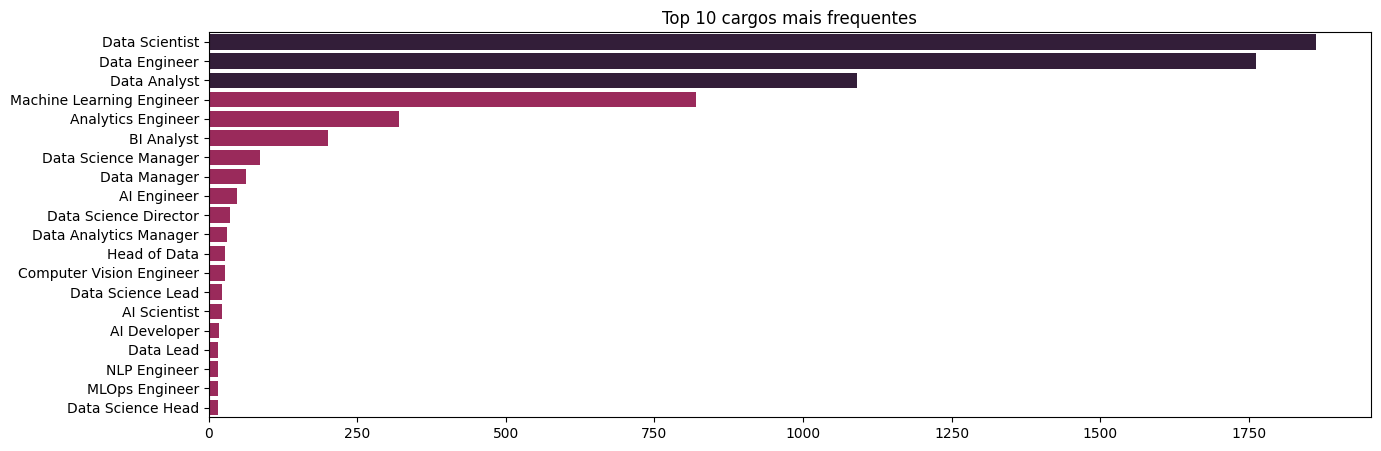

In [23]:
# TOP 10 CARGOS MAIS FREQUENTES
cargos = df_ds_salaries.cargo.value_counts().head(20)
cols = ['#ad1759' if (x < 900) else '#35193e' for x in cargos]

plt.figure(figsize=(15,5))
plt.title('Top 10 cargos mais frequentes')
ax = sns.barplot(y=cargos.index, x=cargos, orient='h', palette=cols)
ax.set(xlabel=None, ylabel=None)
plt.show()

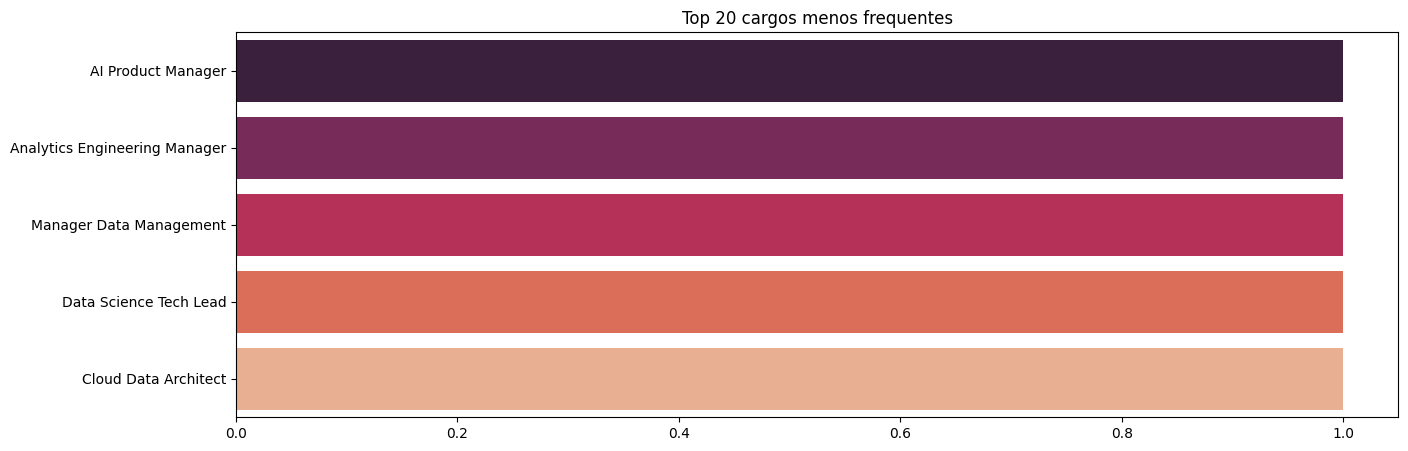

In [24]:
# TOP 10 CARGOS MENOS FREQUENTES
cargos = df_ds_salaries.cargo.value_counts().tail()
cols = ['#086375' if (x < 900) else '#086375' for x in cargos]

plt.figure(figsize=(15,5))
plt.title('Top 20 cargos menos frequentes')
ax = sns.barplot(y=cargos.index, x=cargos, orient='h', palette='rocket')
ax.set(xlabel=None, ylabel=None)
plt.show()

__CARGOS MAIS FREQUENTES__

- Os 3 primeiros cargos de Data Scientist, Data Engineer e Data Analyst são os cargos mais frequentes.
- À partir do cargo Machine Learning Engineer, a frequência diminui muito, em seguida vem o cargo de Analytics Engineer com uma queda bem grande, seguido dos outros cargos.

__CARGOS MENOS FREQUENTES__

- Analytics Engineering Manager, AWS Data Architect, Manager Data Management, Data Science Tech Lead e Cloud Data Architect são 5 dos cargos menos frequentes, ou seja, os cargos menos frequentes são cargos com funções específicas, mas que se assemelham muito com alguns cargos tradicionais mais frequentes. 

#### Feature Nível de Experiência

Quais são os Níveis de Experiência mais frequentes?

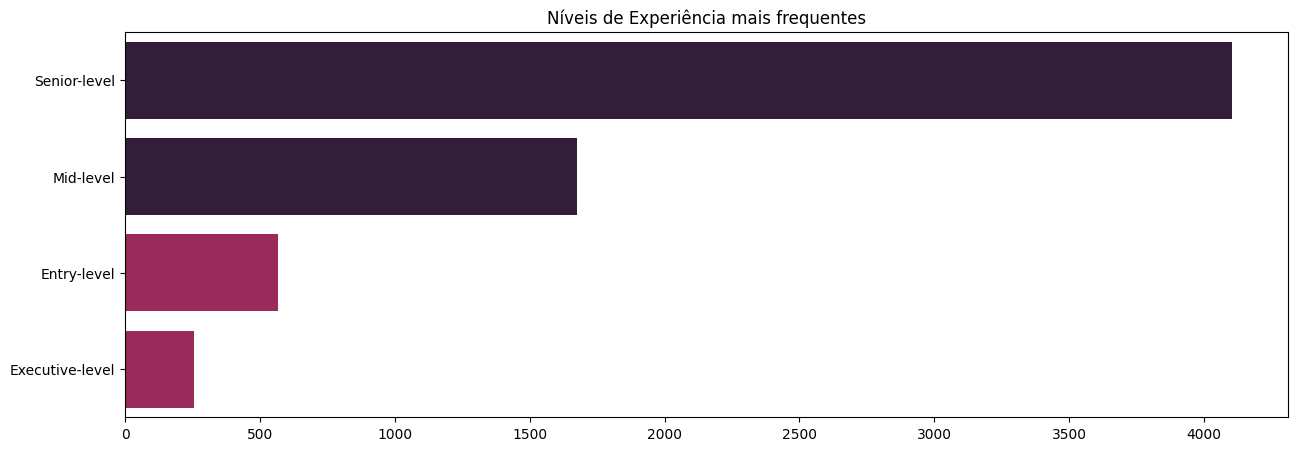

In [25]:
# NÍVEIS DE EXPERIÊNCIA MAIS FREQUENTES
nivelDeExperiencia = df_ds_salaries.nivel_de_experiencia.value_counts()
cols = ['#ad1759' if (x < 900) else '#35193e' for x in nivelDeExperiencia]

plt.figure(figsize=(15,5))
plt.title('Níveis de Experiência mais frequentes')
ax = sns.barplot(y=nivelDeExperiencia.index, x=nivelDeExperiencia, orient='h', palette=cols)
ax.set(xlabel=None, ylabel=None)
plt.show()

- O nível Sênior é o de maior frequência no dataset, Mid-level seria equivalente a Pleno, não chega nem na metade do nível Sênior,
Entry-level seria equivalente à Júnior, não chega nem na metade do nível Pleno, e Executive seria equivalente Executivo, não chega nem na metade do nível Júnior. 

- Mas precisamos entender o seguinte:<br> 
  O nível Executivo realmente sempre terá níveis baixos, pois é um cargo com poucas vagas, e somente pessoas com muito tempo de experiência e conhecimento conseguem chegar.<br> 
  O nível Júnior provavelmente possui índices baixos devido a falta de mais oportunidades na área.<br>
  E os níveis Pleno e Sênior são os cargos onde as empresas mais contratam.

#### Feature Tipos de Emprego

Quais são os Tipos de Emprego mais frequentes?

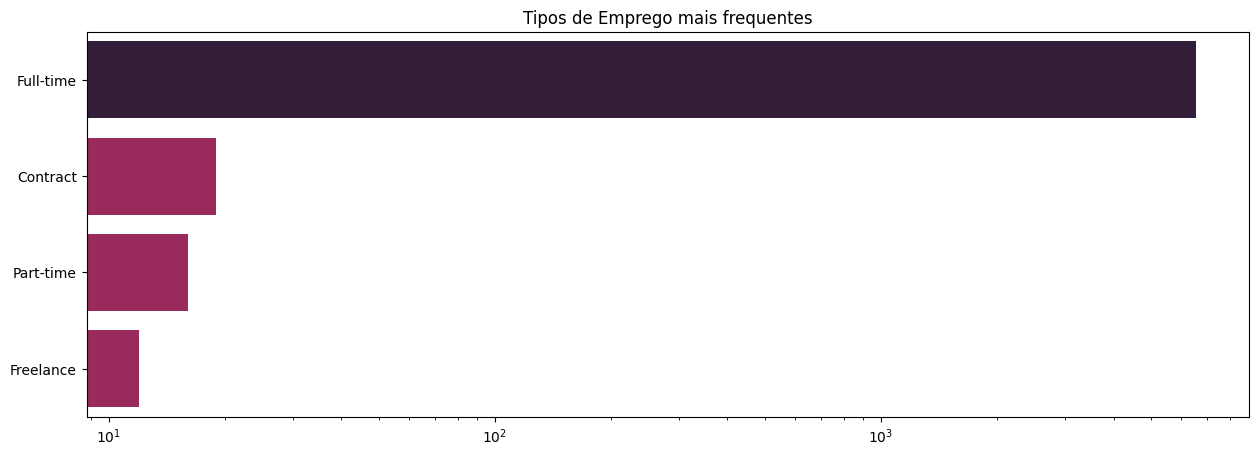

In [26]:
# TIPOS DE EMPREGO MAIS FREQUENTES
tipoDeEmprego = df_ds_salaries.tipo_de_emprego.value_counts()
cols = ['#ad1759' if (x < 900) else '#35193e' for x in tipoDeEmprego]

plt.figure(figsize=(15,5))
plt.title('Tipos de Emprego mais frequentes')
ax = sns.barplot(y=tipoDeEmprego.index, x=tipoDeEmprego, orient='h', palette=cols)
ax.set(xlabel=None, ylabel=None)
ax = plt.xscale('log')
plt.show()

- Aqui temos o Tipo de Emprego Full-time, equivalente à Período Integral sendo o mais frequente no dataset. Contract, equivalente à Contrato, Part-time equivalente à meio período e Freelance equivalente à Freelancer são os Tipos de Emprego com bem menos frequencia do que Período Integral. 
- Sabemos que isso realmente é um fato, grande maioria dos empregos até hoje são com Período Integral, 44 horas semanais ou até um pouco mais. 

#### Feature Modelos de Trabalho

Quais são os Modelos de Trabalho mais frequentes?

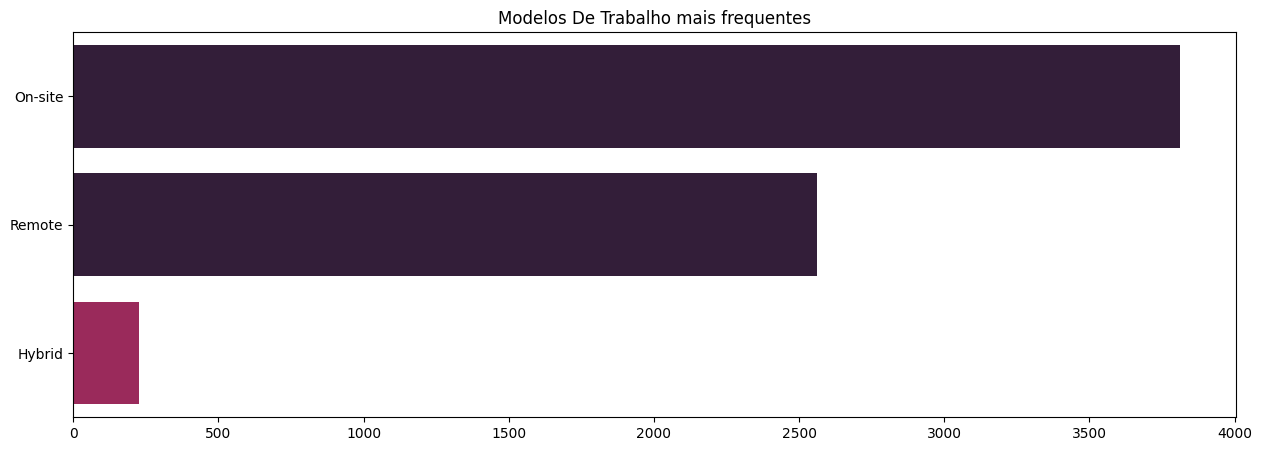

In [27]:
# MODELOS DE TRABALHO MAIS FREQUENTES
modelosDeTrabalho = df_ds_salaries.modelos_de_trabalho.value_counts()
cols = ['#ad1759' if (x < 900) else '#35193e' for x in modelosDeTrabalho]

plt.figure(figsize=(15,5))
plt.title('Modelos De Trabalho mais frequentes')
ax = sns.barplot(y=modelosDeTrabalho.index, x=modelosDeTrabalho, orient='h', palette=cols)
ax.set(xlabel=None, ylabel=None)
plt.show()

- On-site equivalente à Presencial é o Modelo de Trabalho mais frequente, seguido do Modelo Remoto, Hybrid equivalente ao Modelo Híbrido é o Modelo de Trabalho menos frequente.            

#### Feature Ano Trabalho

Qual é o Ano Trabalho mais frequente?

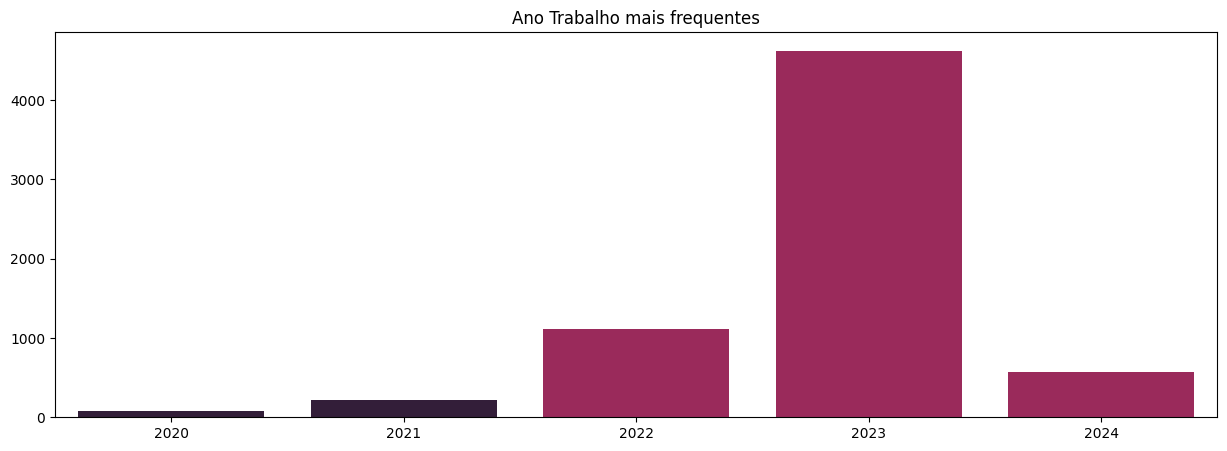

In [28]:
# ANO TRABALHO MAIS FREQUENTES
anoTrabalho = df_ds_salaries.ano_trabalho.value_counts()
cols = ['#ad1759' if (x < 900) else '#35193e' for x in anoTrabalho]

plt.figure(figsize=(15,5))
plt.title('Ano Trabalho mais frequentes')
ax = sns.barplot(x=anoTrabalho.index, y=anoTrabalho, orient='v', palette=cols)
ax.set(xlabel=None, ylabel=None)
plt.show()

- 2023 foi o Ano Trabalho mais frequente, com mais de 4.000 registros, seguido de 2022 com um pouco mais de 1.000 registros, depois 2024 com menos de 1.000 registros, em seguida vem o ano de 2021 e 2020. 
- Aqui há algo interessante para ser investigado. Porquê 2023 tem tantos registros? Muito mais do que os outros anos? 

#### Feature Residência Funcionário

Qual é a residência do funcionário mais frequente?

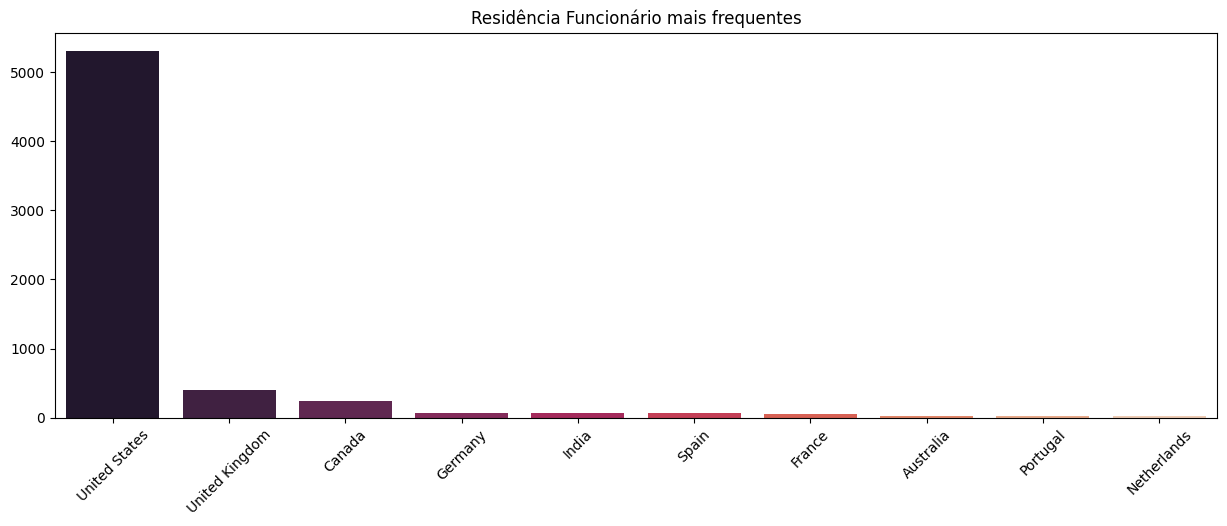

In [29]:
# RESIDÊNCIA FUNCIONÁRIO MAIS FREQUENTES
residenciaFuncionario = df_ds_salaries.residencia_funcionario.value_counts().head(10)

plt.figure(figsize=(15,5))
plt.title('Residência Funcionário mais frequentes')
ax = sns.barplot(x=residenciaFuncionario.index, y=residenciaFuncionario, orient='v', palette='rocket')
ax.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)
plt.show()

- ESTADOS UNIDOS é disparado como o local residência do funcionário mais frequente, com mais de 5.000 registros, em seguida vem o Reino Unido com menos de 1.000 registros, depois Canadá e Alemanha.

#### Feature Salário

Qual é o salário mais frequente?

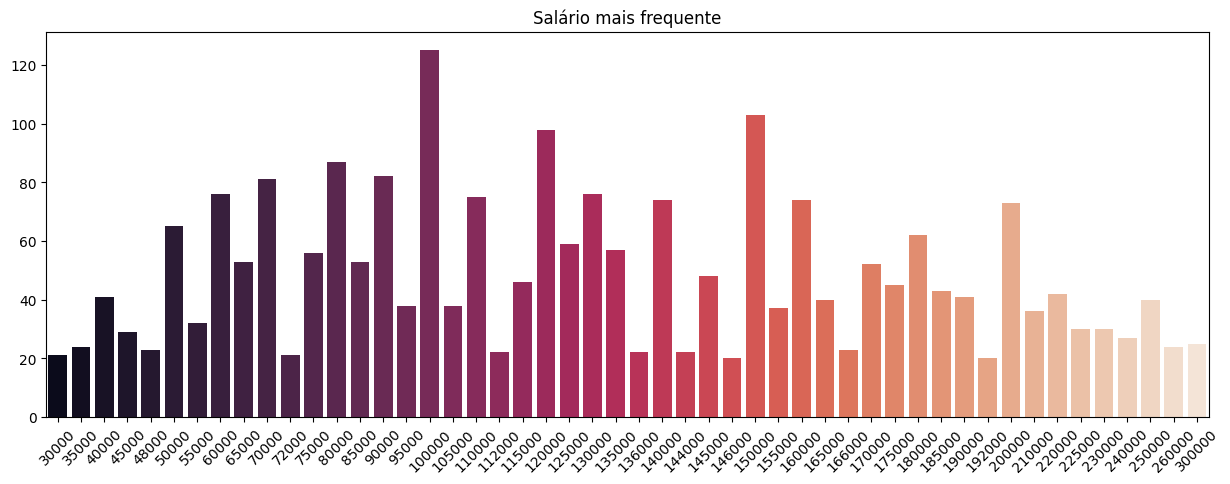

In [30]:
# TOP 50 SALÁRIOS MAIS FREQUENTES
salario = df_ds_salaries.salario.value_counts()[:50]

plt.figure(figsize=(15,5))
plt.title('Salário mais frequente')
ax = sns.barplot(x=salario.index, y=salario, orient='v', palette='rocket')
ax.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)
plt.show()

- Os Salários mais frequentes começam em 100.000 e continuam com 150.000, 120.000, 80.000 e 90.000.

#### Feature Salário Moeda

Qual é o salário moeda mais frequente?

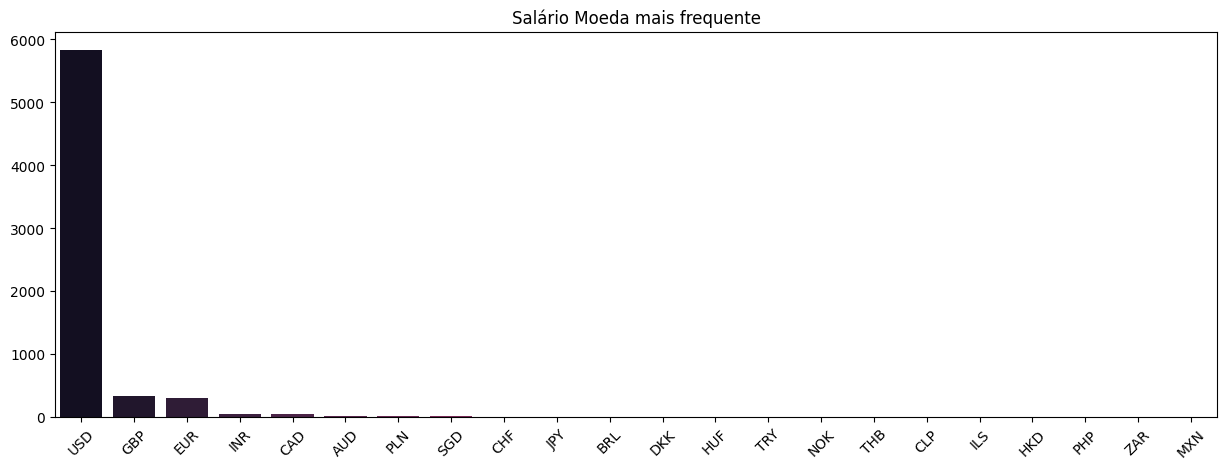

In [31]:
# TOP 50 SALÁRIOS MOEDA MAIS FREQUENTES
salarioMoeda = df_ds_salaries.salario_moeda.value_counts()[:50]

plt.figure(figsize=(15,5))
plt.title('Salário Moeda mais frequente')
ax = sns.barplot(x=salarioMoeda.index, y=salarioMoeda, orient='v', palette='rocket')
ax.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)
plt.show()

- Dólar é disparado como a moeda mais frequente.

#### Feature Salário em Dólar

Qual é o salário em dólar mais frequente?

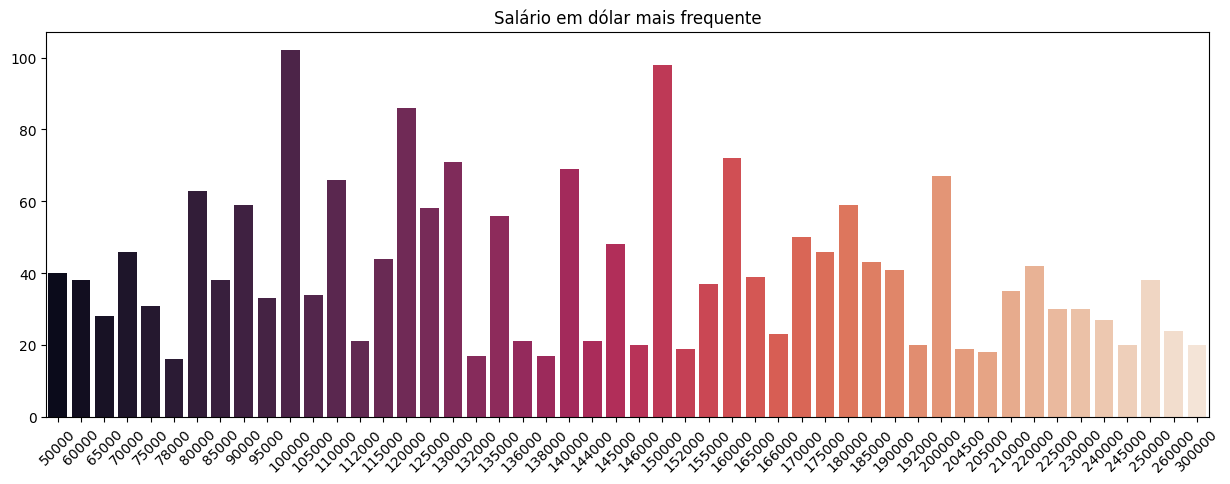

In [32]:
# TOP 50 SALÁRIOS EM DÓLAR MAIS FREQUENTE
salario = df_ds_salaries.salario_em_dolar.value_counts()[:50]

plt.figure(figsize=(15,5))
plt.title('Salário em dólar mais frequente')
ax = sns.barplot(x=salario.index, y=salario, orient='v', palette='rocket')
ax.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)
plt.show()

- Aqui em salário em dólar segue a mesma frequência da feature salário.

#### Feature Local da Empresa

Qual é o local da empresa mais frequente?

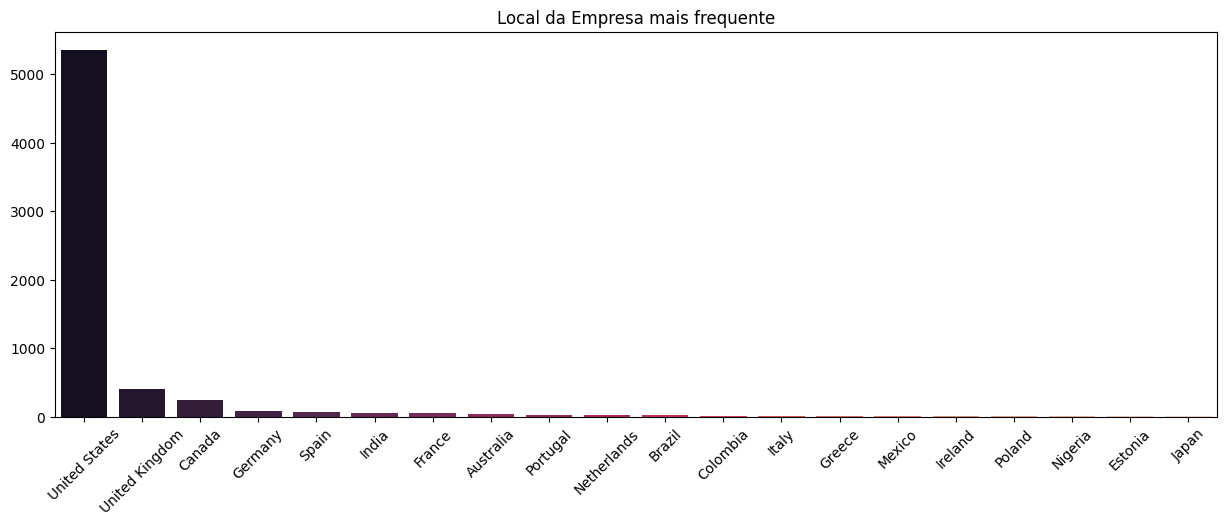

In [33]:
# LOCAL DA EMPRESA MAIS FREQUENTE
localDaEmpresa = df_ds_salaries.local_da_empresa.value_counts()[:20]

plt.figure(figsize=(15,5))
plt.title('Local da Empresa mais frequente')
ax = sns.barplot(x=localDaEmpresa.index, y=localDaEmpresa, orient='v', palette='rocket')
ax.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)
plt.show()

- Estados Unidos segue disparado novamente como o local mais frequente, seguido do reino unido, canadá e alemanha.

#### Feature Tamanho da Empresa

Qual é o tamanho da empresa mais frequente?

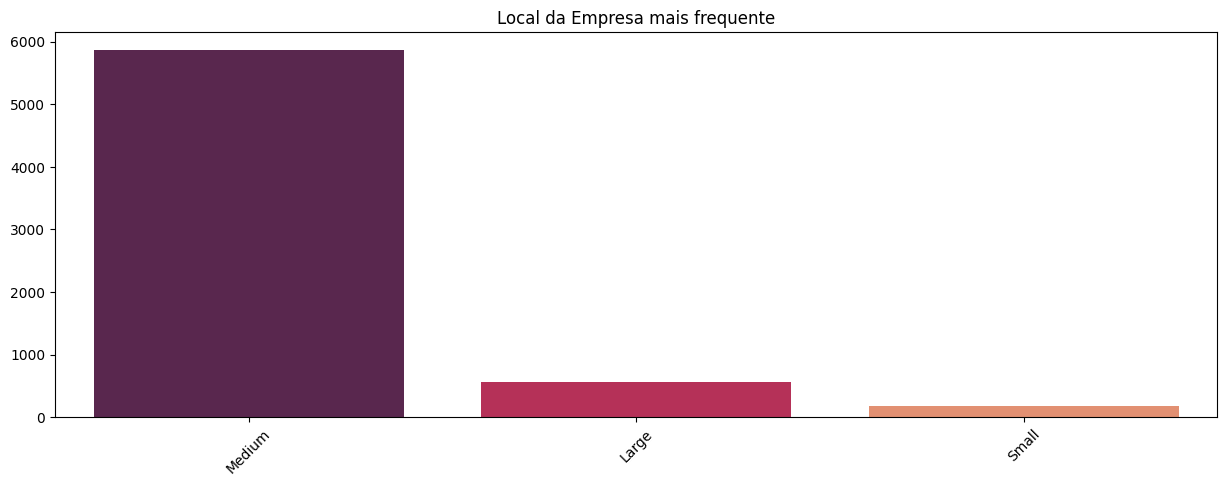

In [34]:
# TAMANHO DA EMPRESA MAIS FREQUENTE
tamanhoDaEmpresa = df_ds_salaries.tamanho_da_empresa.value_counts()

plt.figure(figsize=(15,5))
plt.title('Local da Empresa mais frequente')
ax = sns.barplot(x=tamanhoDaEmpresa.index, y=tamanhoDaEmpresa, orient='v', palette='rocket')
ax.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)
plt.show()

- Tamanho médio é o tamanho com maior frequência das empresas, provavelmente se deve porquê a maioria das empresas não possuem tantos funcionários assim como as grandes empresas de tecnologia como apple, microsoft, netflix, facebook. Então um tamanho médio é o que se esperava.

### 10.1 Análise Bivariada

- Nessa primeira etapa farei uma análise bivariada com a feature cargo junto todas as outras features. Ex: (cargo x nivel_de_experiencia, cargo x tipo_de_emprego)

1. Quais são os cargos mais frequentes com relação ao nível de experiência?

In [35]:
df_ds_salaries.groupby(['cargo'])['nivel_de_experiencia'].value_counts().sort_values(ascending=False)

cargo                      nivel_de_experiencia
Data Scientist             Senior-level            1174
Data Engineer              Senior-level            1139
Machine Learning Engineer  Senior-level             613
Data Analyst               Senior-level             564
Data Scientist             Mid-level                505
                                                   ... 
Data Scientist Lead        Mid-level                  1
                           Senior-level               1
Lead Data Engineer         Mid-level                  1
                           Executive-level            1
Cloud Data Architect       Senior-level               1
Name: nivel_de_experiencia, Length: 102, dtype: int64

In [36]:
fig = px.histogram(df_ds_salaries, x='nivel_de_experiencia', color='cargo', title="Cargo x Nível de Experiência")

fig.show()

- Os cargos mais frequentes com relação ao nível de experiência são o nível sênior com os cargos de Data Engineer, Data Scientist e Data Analyst.
- Provavelmente a maior frequência no nível sênior se deve ao tempo de trabalho, garantindo mais experiência.

2. Quais são os cargos mais frequentes com relação ao tipo de emprego?

In [37]:
df_ds_salaries.groupby(['cargo'])['tipo_de_emprego'].value_counts().sort_values(ascending=False)

cargo                              tipo_de_emprego
Data Scientist                     Full-time          1848
Data Engineer                      Full-time          1758
Data Analyst                       Full-time          1077
Machine Learning Engineer          Full-time           813
Analytics Engineer                 Full-time           320
                                                      ... 
Computer Vision Engineer           Part-time             1
Computer Vision Software Engineer  Part-time             1
Data Analyst Lead                  Full-time             1
Data Science Tech Lead             Full-time             1
Data Engineer                      Contract              1
Name: tipo_de_emprego, Length: 62, dtype: int64

In [38]:
fig = px.histogram(df_ds_salaries, x='tipo_de_emprego', color='cargo', title="Cargo x Tipo de Emprego")

fig.show()

- Os cargos mais frequentes com relação ao tipo de emprego onde o modo full-time (período integral) é o mais frequente são o Data Engineer, Data Scientist, Data Analyst e Machine Learning Engineer, esses são os cargos principais e mais frequentes em qualquer área de dados.

3. Quais são os cargos mais frequentes com relação ao modelo de trabalho?

In [39]:
df_ds_salaries.groupby(['cargo'])['modelos_de_trabalho'].value_counts().sort_values(ascending=False)

cargo                              modelos_de_trabalho
Data Scientist                     On-site                1109
Data Engineer                      On-site                1020
                                   Remote                  707
Data Scientist                     Remote                  673
Data Analyst                       On-site                 603
                                                          ... 
Data Scientist Lead                Remote                    1
AI Research Engineer               On-site                   1
Computer Vision Software Engineer  Hybrid                    1
Head of Data                       Hybrid                    1
Data Analytics Lead                Remote                    1
Name: modelos_de_trabalho, Length: 99, dtype: int64

In [40]:
fig = px.histogram(df_ds_salaries, x='modelos_de_trabalho', color='cargo', title="Cargo x Modelos de Trabalho")

fig.show()

- Os cargos mais frequentes com relação ao modelo de trabalho onde o modo On-site (Presencial) é o mais frequente são novamente o Data Engineer, Data Scientist, Data Analyst e Machine Learning Engineer, esses são os cargos principais e mais frequentes em qualquer área de dados.

4. Quais são os cargos mais frequentes com relação ao ano trabalho?

In [41]:
df_ds_salaries.groupby(['cargo'])['ano_trabalho'].value_counts().sort_values(ascending=False)

cargo                           ano_trabalho
Data Scientist                  2023            1256
Data Engineer                   2023            1208
Data Analyst                    2023             776
Machine Learning Engineer       2023             606
Data Scientist                  2022             334
                                                ... 
Autonomous Vehicle Technician   2023               1
                                2021               1
Analytics Engineering Manager   2023               1
Computer Vision Engineer        2020               1
Lead Machine Learning Engineer  2023               1
Name: ano_trabalho, Length: 116, dtype: int64

In [42]:
fig = px.histogram(df_ds_salaries, x='ano_trabalho', color='cargo', title="Cargo x Ano Trabalho")

fig.show()

- Os cargos mais frequentes com relação ao ano trabalho são novamente o Data Engineer, Data Scientist, Data Analyst e Machine Learning Engineer, concentrados na maior parte no ano de 2023.
- Vamos investigar o porquê de 2023 ter uma frequência tão grande.

5. Quais são os cargos mais frequentes com relação a residência funcionário?

In [43]:
df_ds_salaries.groupby(['cargo'])['residencia_funcionario'].value_counts().sort_values(ascending=False)

cargo                      residencia_funcionario
Data Scientist             United States             1517
Data Engineer              United States             1450
Data Analyst               United States              883
Machine Learning Engineer  United States              651
Analytics Engineer         United States              269
                                                     ... 
Data Science Director      France                       1
                           Italy                        1
                           Japan                        1
AI Scientist               Ghana                        1
Data Engineer              Peru                         1
Name: residencia_funcionario, Length: 325, dtype: int64

In [44]:
fig = px.histogram(df_ds_salaries, x='residencia_funcionario', color='cargo', title="Cargo x Residência Funcionário")

fig.show()

- Os cargos mais frequentes com relação a residência funcionário são novamente o Data Engineer, Data Scientist, Data Analyst e Machine Learning Engineer, concentrados em grande parte nos estados unidos, em segundo lugar vem o canadá, e em terceiro lugar, a áfrica do sul.

6. Quais são os cargos mais frequentes com relação ao salário?

In [45]:
df_ds_salaries.groupby(['cargo'])['salario'].count().sort_values(ascending=False)

cargo
Data Scientist                       1863
Data Engineer                        1763
Data Analyst                         1091
Machine Learning Engineer             820
Analytics Engineer                    320
BI Analyst                            200
Data Science Manager                   86
Data Manager                           63
AI Engineer                            48
Data Science Director                  35
Data Analytics Manager                 31
Head of Data                           28
Computer Vision Engineer               28
AI Scientist                           22
Data Science Lead                      22
AI Developer                           18
Data Lead                              16
MLOps Engineer                         15
Data Science Head                      15
NLP Engineer                           15
Data Product Manager                   12
Lead Data Scientist                    10
AI Architect                           10
Data Analytics Lead         

In [46]:
fig = px.histogram(df_ds_salaries[:1000], x='salario', color='cargo', title="Cargo x Salário")

fig.show()

- Os cargos mais frequentes com relação ao salário são novamente o Data Engineer, Data Scientist, Data Analyst e Machine Learning Engineer.
- Os salários mais frequentes variam em torno de 10.000 e vão até em torno de 340.000, isso de um modo geral para todos os cargos.
- Mas como visto anteriormente, podemos ver que existem salários bem fora da média, valores de 350.000 até 760.000, será visto com mais cautela.

7. Quais são os cargos mais frequentes com relação ao salário moeda?

In [47]:
df_ds_salaries.groupby(['cargo'])['salario_moeda'].value_counts().sort_values(ascending=False)

cargo                              salario_moeda
Data Scientist                     USD              1647
Data Engineer                      USD              1560
Data Analyst                       USD               964
Machine Learning Engineer          USD               741
Analytics Engineer                 USD               301
                                                    ... 
AI Scientist                       DKK                 1
                                   ILS                 1
Data Science Tech Lead             USD                 1
Data Science Manager               EUR                 1
Computer Vision Software Engineer  DKK                 1
Name: salario_moeda, Length: 149, dtype: int64

In [48]:
fig = px.histogram(df_ds_salaries, x='salario_moeda', color='cargo', title="Cargo x Salário Moeda")

fig.show()

- Os cargos mais frequentes com relação ao salário moeda são novamente o Data Engineer, Data Scientist, Data Analyst e Machine Learning Engineer, e o dólár - USD, é a moeda mais frequente.

8. Quais são os cargos mais frequentes com relação ao local da empresa?

In [49]:
df_ds_salaries.groupby(['cargo'])['local_da_empresa'].value_counts().sort_values(ascending=False)

cargo                      local_da_empresa
Data Scientist             United States       1530
Data Engineer              United States       1455
Data Analyst               United States        893
Machine Learning Engineer  United States        655
Analytics Engineer         United States        270
                                               ... 
BI Analyst                 Ghana                  1
Data Analytics Manager     Netherlands            1
                           India                  1
BI Analyst                 Japan                  1
Data Engineer              Turkey                 1
Name: local_da_empresa, Length: 299, dtype: int64

In [50]:
fig = px.histogram(df_ds_salaries, x='local_da_empresa', color='cargo', title="Cargo x Local da Empresa")

fig.show()

- Os cargos mais frequentes com relação ao local da empresa são novamente o Data Engineer, Data Scientist, Data Analyst e Machine Learning Engineer, e o estados unidos são o local mais frequente.

9. Quais são os cargos mais frequentes com relação ao tamanho da empresa?

In [51]:
df_ds_salaries.groupby(['cargo'])['tamanho_da_empresa'].value_counts().sort_values(ascending=False)

cargo                      tamanho_da_empresa
Data Engineer              Medium                1637
Data Scientist             Medium                1608
Data Analyst               Medium                 990
Machine Learning Engineer  Medium                 727
Analytics Engineer         Medium                 298
                                                 ... 
Data Manager               Small                    1
Cloud Data Architect       Large                    1
Data Analytics Lead        Large                    1
Data Analyst Lead          Small                    1
Data Science Tech Lead     Large                    1
Name: tamanho_da_empresa, Length: 89, dtype: int64

In [52]:
fig = px.histogram(df_ds_salaries, x='tamanho_da_empresa', color='cargo', title="Cargo x Tamanho da Empresa")

fig.show()

- Os cargos mais frequentes com relação ao tamanho da empresa são novamente o Data Engineer, Data Scientist, Data Analyst e Machine Learning Engineer, e o tamanho médio é o valor mais frequente no tamanho da empresa.

#### 10.2 Análise Bivariada - Variáveis Qualitativas Nominais - Coeficiente V de Cramer

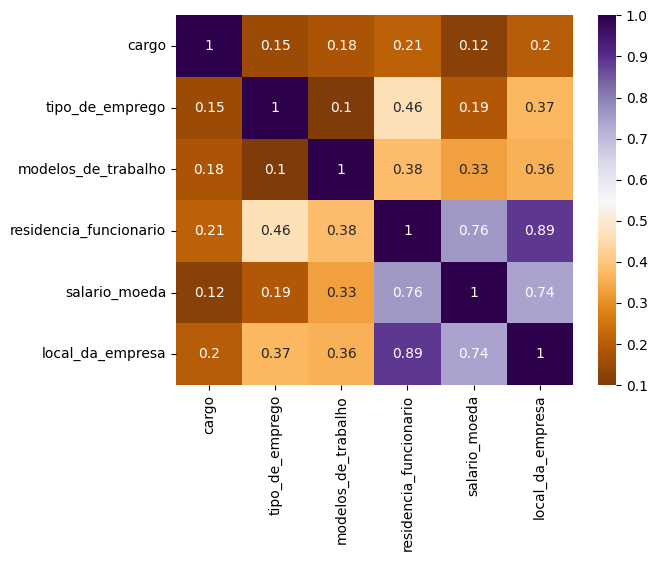

In [53]:
vars_qual_nominais = df_ds_salaries[variaveis_qualitativas_nominais]

df_vazio = pd.DataFrame() 

for i in vars_qual_nominais.columns :
  df_vazio[i]=vars_qual_nominais[i]
rows = []

for x in df_vazio:
    col = []
    for y in df_vazio:
        cramers = cramer_v(df_vazio[x], df_vazio[y])
        col.append(round(cramers, 2))
    rows.append(col)

cramers_resultados = np.array(rows)
cramer_v_df = pd.DataFrame(cramers_resultados, columns=df_vazio.columns, index=df_vazio.columns)

mask = np.triu(np.ones_like(cramer_v_df))
dataplot = sns.heatmap(cramer_v_df, cmap="PuOr", mask=None, annot = True)

Podemos ver que utilizando o coeficiente V de Cramer as medidas de associação entre as variáveis nominais mais fortes ficaram da seguinte forma:
- residencia_funcionario x local_da_empresa tem forte associação, isso é fato, o funcionário tem sua localidade e trabalha remotamente ou presencialmente em outra localidade - empresa.
- salario_moeda x residencia_funcionario também possui forte associação, isso também não é novidade porque de onde você trabalhar, você vai receber o seu salário através de uma moeda. Ex: Dólar, Real, Euro, etc.
- local_da_empresa x salario_moeda também tem forte associação, também é um fato, pois qualquer local da empresa precisa ter um salário moeda. Ex: Dólar, Real, Euro, etc.

#### 10.3 Análise Bivariada - Variáveis Qualitativas Ordinais - Coeficiente de Spearman

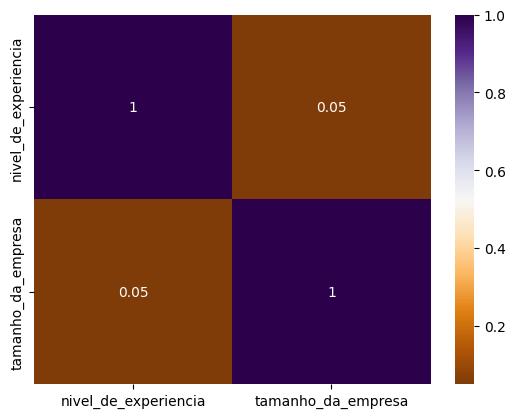

In [54]:
vars_qual_ordinais = df_ds_salaries[variaveis_qualitativas_ordinais]

df_vazio = pd.DataFrame() 

for i in vars_qual_ordinais.columns :
  df_vazio[i]=vars_qual_ordinais[i]
rows = []

for x in df_vazio:
    col = []
    for y in df_vazio:
        spearmans = coef_spearman(df_vazio[x], df_vazio[y])
        col.append(round(spearmans, 2))
    rows.append(col)

spearman_resultados = np.array(rows)
spearman_df = pd.DataFrame(spearman_resultados, columns=df_vazio.columns, index=df_vazio.columns)

mask = np.triu(np.ones_like(spearman_df))
dataplot = sns.heatmap(spearman_df, cmap="PuOr", mask=None, annot = True)

- Podemos ver que a relação entre as únicas variáveis qualitativas ordinais não são fortes. 0.0.5 é um número bem fraco.

#### 10.4 Análise Bivariada - Variáveis Quantitativas - Coeficiente de correlação de Pearson

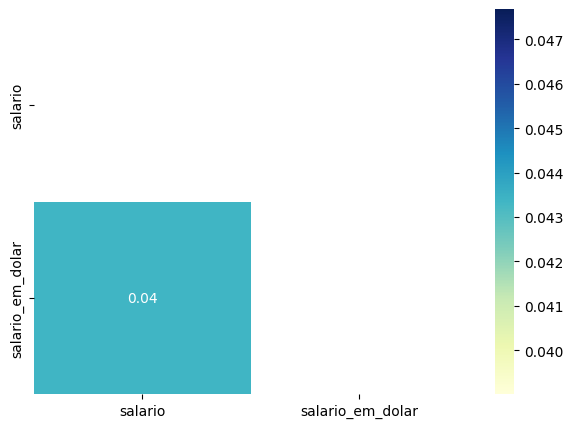

In [55]:
vars_quant_continuas = df_ds_salaries[variaveis_quantitativas_continuas]

cr = vars_quant_continuas.corr()
plt.figure(figsize=(7,5))
mask = np.triu(np.ones_like(cr.corr()))
sns.heatmap(cr,annot=True,fmt=".2f",cmap="YlGnBu", mask=mask)
plt.show()

- Podemos ver que a relação entre as únicas variáveis quantitativas contínuas também são bem fracas.

- Bom, de um modo geral, vimos que todas as relações entre as variáveis não são muito significantes. Vamos aprofundando com a análise para obter melhores informações.

### 10.2 Análise Multivariada

1. Os salários de todos os cargos aumentaram mais a partir de qual ano ?

In [56]:
salarios_ano_trabalho = df_ds_salaries[['ano_trabalho','salario']].groupby(['ano_trabalho']).agg(lambda x: sum(x)).reset_index()

In [57]:
fig = px.line(salarios_ano_trabalho, x="ano_trabalho", y="salario", 
              title='Somatório dos Salários em todos os Cargos x Ano Trabalho', 
              markers=True)
fig.show()

- Os salários de todos os cargos começaram a aumentar à partir de 2022 com um total de 201.670.896, então atingiu um maior pico em 2023, com o total de 745.986.176, depois caiu em 2024 para um total de 87.023.566.

2. Os salários dos cargos de Data Scientist, Data Engineer, Data Analyst e Machine Learning Engineer são os mais frequentes, quanto aumentou e a partir de qual ano ?

In [58]:
df_ds_salaries_query_cargo_ds_de_da = df_ds_salaries.query('cargo == "Data Scientist" or \
                                                       cargo == "Data Engineer" or \
                                                       cargo == "Data Analyst" or \
                                                       cargo == "Machine Learning Engineer"')

In [59]:
salarios_ano_trabalho_ds_de_da = df_ds_salaries_query_cargo_ds_de_da[['cargo','ano_trabalho','salario']].groupby(['ano_trabalho', 'cargo']).agg(lambda x: sum(x)).reset_index()

In [60]:
fig = px.line(salarios_ano_trabalho_ds_de_da, x="ano_trabalho", y="salario", color="cargo",
              title='Somatório dos Salários dos Cargos mais Frequentes x Ano Trabalho', markers=True)
fig.show()

- O somatório dos salários dos Data Scientists foi o que começou a aumentar primeiro, à partir de 2020 até 2021.
- Mas de 2021 até  2022 não teve um aumento considerável, ficou bem estável.
- Agora à partir de 2022 até 2023, teve um aumento grande, assim como foi com os outros cargos, que começaram a aumentar à partir do ano de 2021 e em 2022, atingindo o maior pico em 2023.
- No pico em 2023 os Data Scientists ficaram em primeiro, Data Engineer em segundo, Machine Learning Engineer em terceiro, e Data Analyst em quarto. 
- Em 2024 todos os cargos cairam para níveis baixos parecidos com o ano de 2020.

3. Quem mora no brasil trabalha mais em empresas médias ou grandes? Trabalham remotamente dentro do Brasil ou fora? E quem ganha mais? Quais são os níveis de experiência mais frequentes? E em quais anos de trabalho estão distribúidas essas características?

- Antes de iniciar a query é bom saber quantos registros há no brazil.

In [61]:
print('No Brasil há {} registros.'.format(df_ds_salaries.residencia_funcionario.value_counts()['Brazil']))

No Brasil há 19 registros.


- Porquê procurei fazer isso antes? Por causa do processamento, como no brazil há menos registros do que nos estados unidos, a query a seguir fica mais fácil para processar.

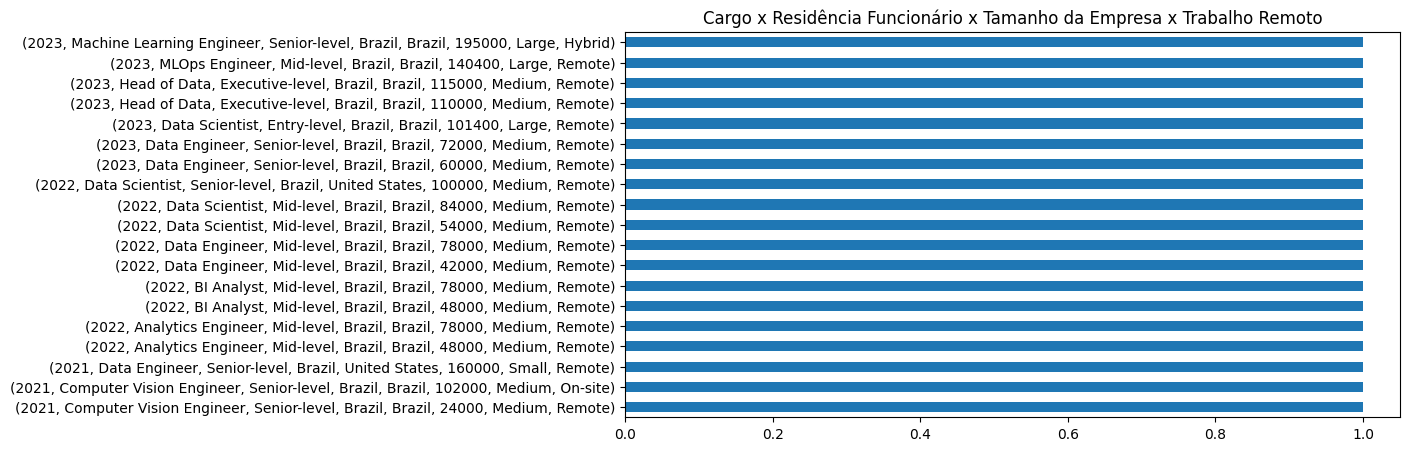

In [62]:
df_ds_salaries[(df_ds_salaries['residencia_funcionario'] == 'Brazil')].\
                groupby(['ano_trabalho',
                         'cargo',
                         'nivel_de_experiencia',
                         'residencia_funcionario',
                         'local_da_empresa',
                         'salario',
                         'tamanho_da_empresa'])['modelos_de_trabalho'].value_counts()\
                        .plot(figsize=(10, 5), kind='barh', 
                        title='Cargo x Residência Funcionário x Tamanho da Empresa x Trabalho Remoto',
                        xlabel='',
                        ylabel='');

- Quem mora no Brasil trabalha mais em empresas médias.
- Trabalham mais remotamante dentro do Brasil do que pra fora.
- Os 3 primeiros que ganham mais são:
  - Machine Learning Engineer (195.000), Data Engineer (160.000) e MLOps Engineer (140.400).
- Os níveis de experiencia mais frequentes são: 
  - Sênior há 7 cargos.
  - Pleno há 9 cargos.
  - Júnior há apenas 1 cargo.
  - Executive-level há apenas 2 cargos.
- 2023 possuem 7 cargos, 2022 possuem 9 cargos e 2021 possuem apenas 3 cargos.
 

4. Qual a maior diferença dos cientistas de dados do brasil e dos estados unidos?

In [63]:
df_ds_salaries[df_ds_salaries['residencia_funcionario'] == 'Brazil']['cargo'].unique()

array(['MLOps Engineer', 'Data Engineer', 'Head of Data',
       'Machine Learning Engineer', 'Data Scientist',
       'Analytics Engineer', 'BI Analyst', 'Computer Vision Engineer'],
      dtype=object)

In [64]:
df_ds_salaries[df_ds_salaries['residencia_funcionario'] == 'United States']['cargo'].unique()

array(['Data Engineer', 'Data Scientist', 'BI Analyst', 'Data Analyst',
       'Data Science Director', 'MLOps Engineer',
       'Machine Learning Engineer', 'Data Science Manager',
       'Analytics Engineer', 'AI Engineer', 'Computer Vision Engineer',
       'Data Lead', 'AI Architect', 'Data Analytics Manager',
       'Data Product Manager', 'Prompt Engineer', 'Data Science Lead',
       'Business Intelligence Manager', 'Data Manager',
       'Data Analytics Lead', 'NLP Engineer', 'AI Scientist',
       'Head of Data', 'AI Developer', 'Data Science Head',
       'AWS Data Architect', 'Lead Data Analyst', 'Lead Data Scientist',
       'Manager Data Management', 'Data Science Tech Lead',
       'Machine Learning Manager', 'Data Scientist Lead',
       'Cloud Data Architect', 'Computer Vision Software Engineer',
       'Lead Data Engineer'], dtype=object)

- A maior diferença realmente está nos cargos, nitidamente, podemos ver que nos estados unidos há uma variedade enorme.
  

<img src="images/to-be-continued.png" width=400 height=317.5 />